## 5. Write a program to demonstrate the working of decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.

### From Scratch

In [16]:
import pandas as pd
import math
import pprint

def entropy(col):
    e = 0
    n = len(col)
    count = col.value_counts()
    for decision in col.unique():
        e -= count[decision] / n * math.log2(count[decision] / n)
    return e

def id3(df, target, features):
    if len(df[target].unique()) == 1:
        return df[target].iloc[0]
    
    if not features:
        return df[target].mode()[0]
    
    best_feature = max(features, key=lambda col: gain(df, col, target))
    tree = {best_feature: {}}
    
    for value in df[best_feature].unique():
        subset = df[df[best_feature] == value]
        tree[best_feature][value] = id3(subset, target, [f for f in features if f != best_feature])
    
    return tree

def gain(df, col, target):
    g = entropy(df[target])
    for value in df[col].unique():
        table = df[df[col] == value]
        g -= len(table) / len(df[col]) * entropy(table[target])
    return g

def classify(tree, sample):
    if not isinstance(tree, dict):
        return tree
    feature = next(iter(tree))
    value = sample[feature]
    subtree = tree.get(feature, {}).get(value, "Unknown")
    return classify(subtree, sample) if isinstance(subtree, dict) else subtree

def print_tree(tree, indent=""):
    if not isinstance(tree, dict):
        print(indent + str(tree))
        return
    
    for key, value in tree.items():
        print(indent + str(key))
        for subkey, subvalue in value.items():
            print(indent + "  ├── " + str(subkey))
            print_tree(subvalue, indent + "  |   ")

data = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"],
    "Temp": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"],
    "Play": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}

df = pd.DataFrame(data)
features = list(df.columns[:-1])
target = "Play"

decision_tree = id3(df, target, features)
print("Decision Tree:")
print_tree(decision_tree)

sample = {"Outlook": "Sunny", "Temp": "Cool", "Humidity": "Normal", "Wind": "Weak"}
print("\nPrediction for new sample:", classify(decision_tree, sample))


Decision Tree:
Outlook
  ├── Sunny
  |   Humidity
  |     ├── High
  |     |   No
  |     ├── Normal
  |     |   Yes
  ├── Overcast
  |   Yes
  ├── Rain
  |   Wind
  |     ├── Weak
  |     |   Yes
  |     ├── Strong
  |     |   No

Prediction for new sample: Yes


### Using Library

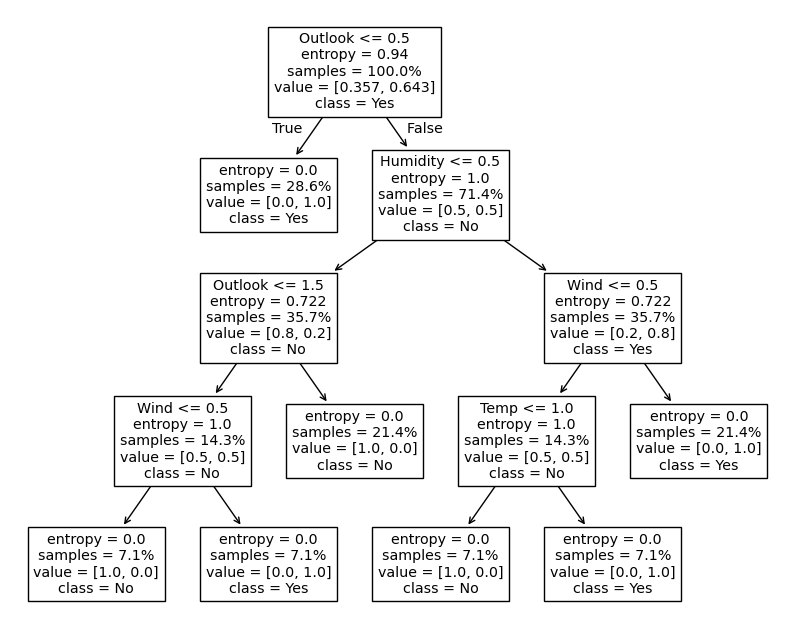

The predicted decision for the sample is: Yes


In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

data = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"],
    "Temp": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"],
    "Play": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}

df = pd.DataFrame(data)
encoders = {}
for col in df.columns:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

x = df.drop(columns=["Play"])
y = df["Play"]

clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(x, y)

plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=x.columns, class_names=encoders["Play"].classes_,  proportion=True)
plt.show()

sample = pd.DataFrame([["Sunny", "Mild", "Normal", "Weak"]], columns=x.columns)

for col in sample.columns:
    sample[col] = encoders[col].transform(sample[col])

predicted = encoders["Play"].inverse_transform(clf.predict(sample))

print(f"The predicted decision for the sample is: {predicted[0]}")